<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/IDS_Assignment_Group250_Navin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <h1>
<b>Team:</b> <br>

1.   NAVIN APPUKUTTAN NAIR - 2021fc04720.  <br>
2.   N VISWANATHAN - 2021fc04318. <br>
3.   RAKESH VITTA - 2021fc04673.  <br>

**Dataset:** Fetal Health <br>

Location of the Dataset: https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/fetal_health.csv  <br>
</h1>

##Library Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import itertools
from sklearn.preprocessing import normalize
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy import stats



import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
np.random.seed(0)

%matplotlib inline

##Dataset

###Importing Dataset






In [2]:
url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/fetal_health.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


###Data Exploration and Visualization

In [4]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  


1.   We see 21 feature columns of which column "fetal_health" is the target/dependent variable. 
2.   All the columns are numeric data



In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


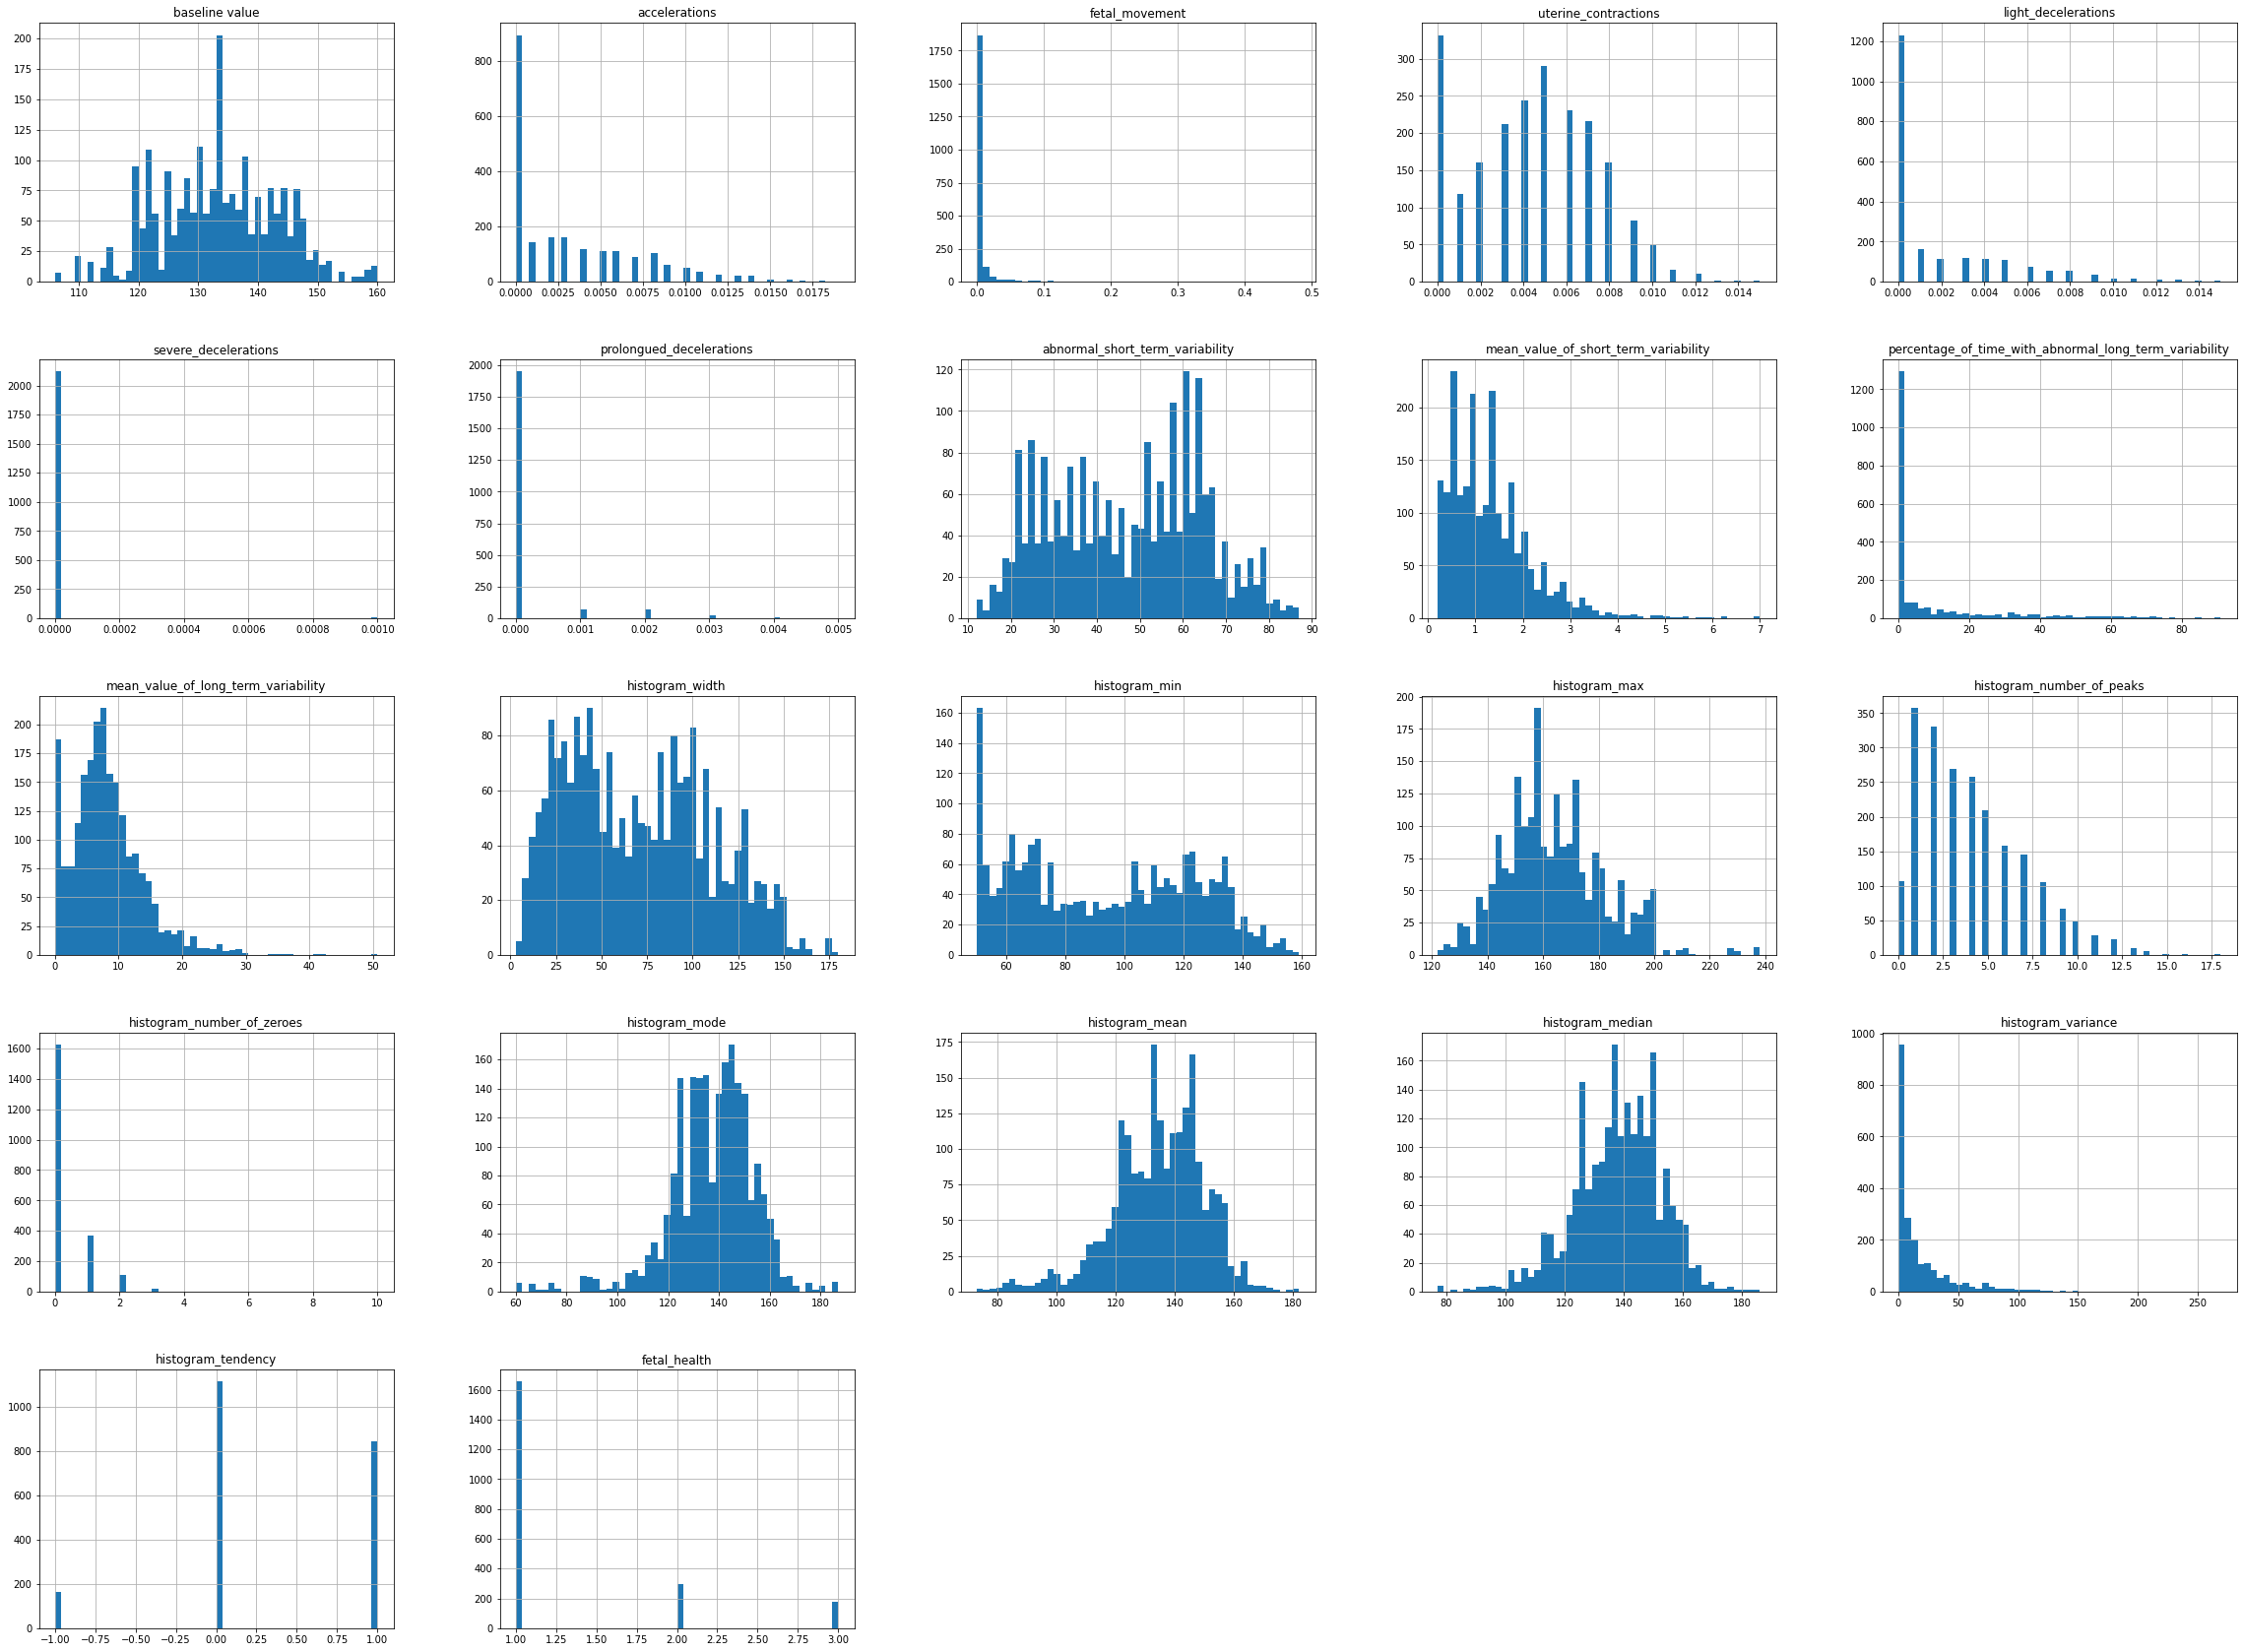

In [7]:
df.hist(bins=50, figsize=(40,30))
plt.show()

We see that not all features are distributed in the same way. Some of them are left skewed and some are right skewed data. 

In [8]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

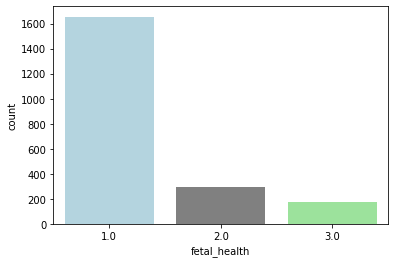

In [9]:
colours=["lightblue","gray", "lightgreen"]
sns.countplot(data=df, x="fetal_health",palette=colours)

Based on the plot above we see that the data is imbalanced and more biased towards one class/target variable type.

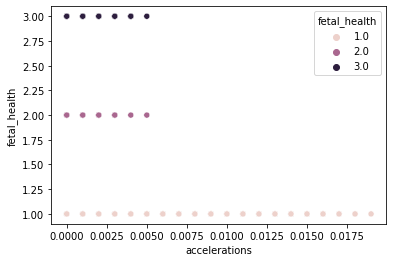

In [10]:
#Checking the distribution of feature "accelerations" against the target variable "fetal_health"
sns.scatterplot(x=df['accelerations'],y=df['fetal_health'],hue=df['fetal_health'])

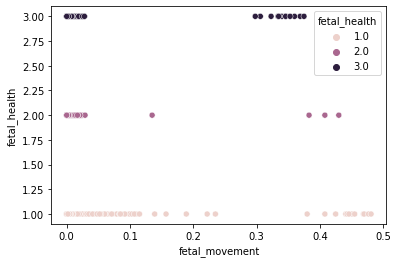

In [11]:
#Checking the distribution of feature "fetal_movement" against the target variable "fetal_health"
sns.scatterplot(x=df['fetal_movement'],y=df['fetal_health'],hue=df['fetal_health'])

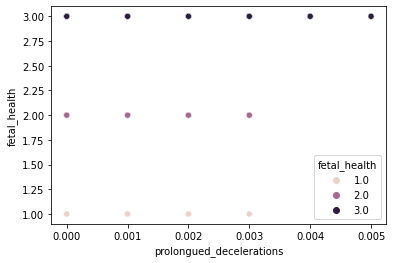

In [12]:
#Checking the distribution of feature "prolongued_decelerations" against the target variable "fetal_health"
sns.scatterplot(x=df['prolongued_decelerations'],y=df['fetal_health'],hue=df['fetal_health'])

In [13]:
fig = px.histogram(data_frame=df, color='fetal_health', marginal="box", x='baseline value', nbins=25)
fig.update_layout(template = 'seaborn',
                  title = 'Histogram plot - baseline value by fetal_health (Target) [+Marginal Box-plot]')

fig.show()

means = df.groupby('fetal_health').mean()

###Missing Data and Preprocessing Challenges

In [14]:
#Checking for any missing data
# checking for null values
null_counts = df.isna().sum().sort_values(ascending = False)
print('NULL COUNTS\n---- ------')
print(null_counts)

NULL COUNTS
---- ------
baseline value                                            0
accelerations                                             0
histogram_tendency                                        0
histogram_variance                                        0
histogram_median                                          0
histogram_mean                                            0
histogram_mode                                            0
histogram_number_of_zeroes                                0
histogram_number_of_peaks                                 0
histogram_max                                             0
histogram_min                                             0
histogram_width                                           0
mean_value_of_long_term_variability                       0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_short_term_variability                      0
abnormal_short_term_variability                           0
prolongued_decel

We see there are no missing values in the data set

###Correlation Analysis

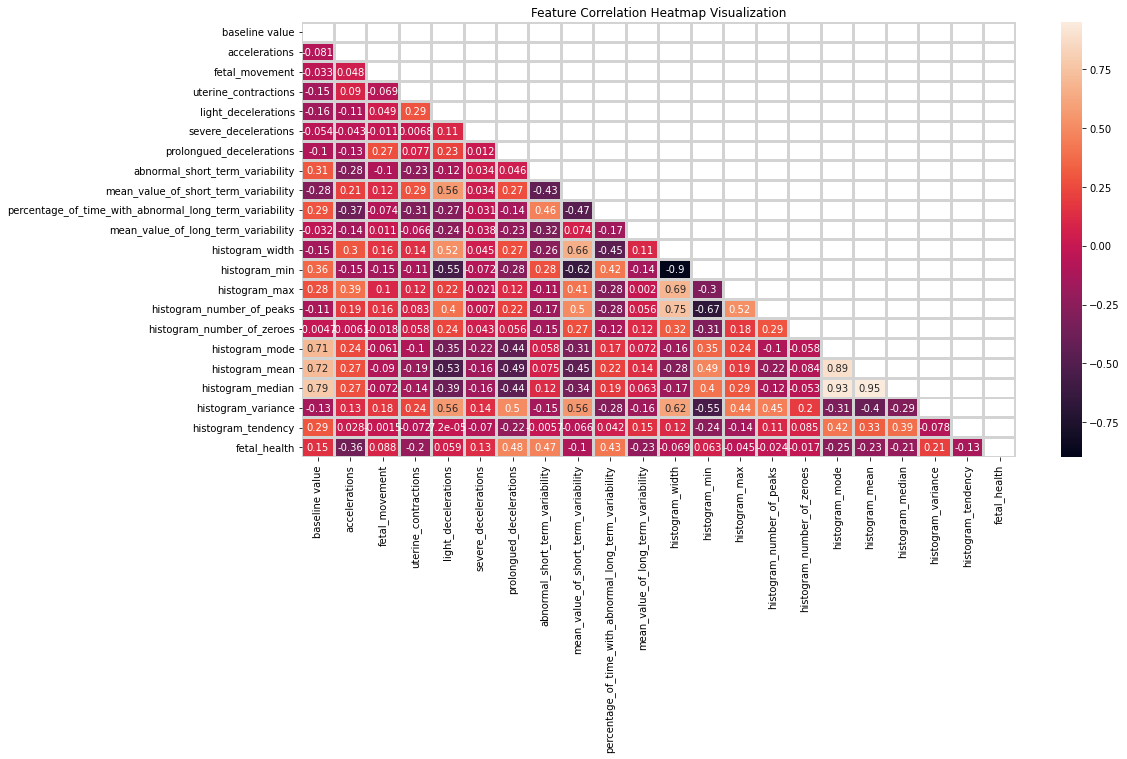

In [15]:
#Generating Correlation Matrix
corrmat= df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corrmat, annot=True, linewidths=2, linecolor='lightgrey', mask=np.triu(corrmat))
plt.title('Feature Correlation Heatmap Visualization')
plt.show()


Observations from Correlation Matrix:

1.   We see that histogram_median and histogram_mean are highly correlated ( 0.95)
2.   We see that histogram_min and histogram_width are highly not correlated ( -0.9)

But we dont see any correlation which is beyond the threshold 0.97 or -0.97 to remove the correlated features

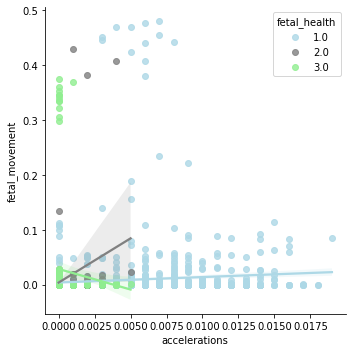

In [16]:
sns.lmplot(data=df ,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

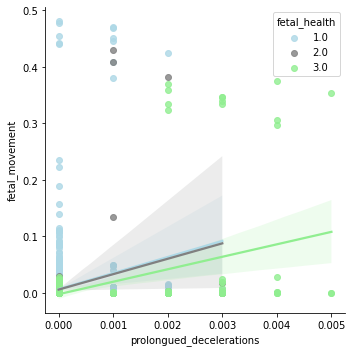

In [17]:
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

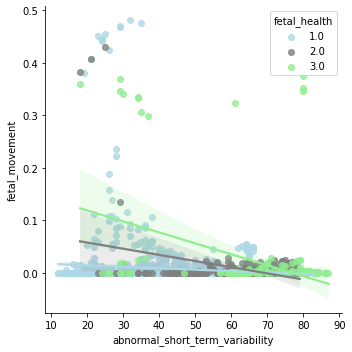

In [18]:
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

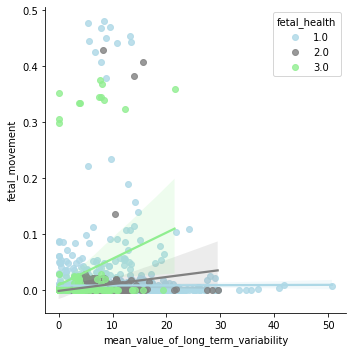

In [19]:
sns.lmplot(data =df,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

###Box Plot of the features

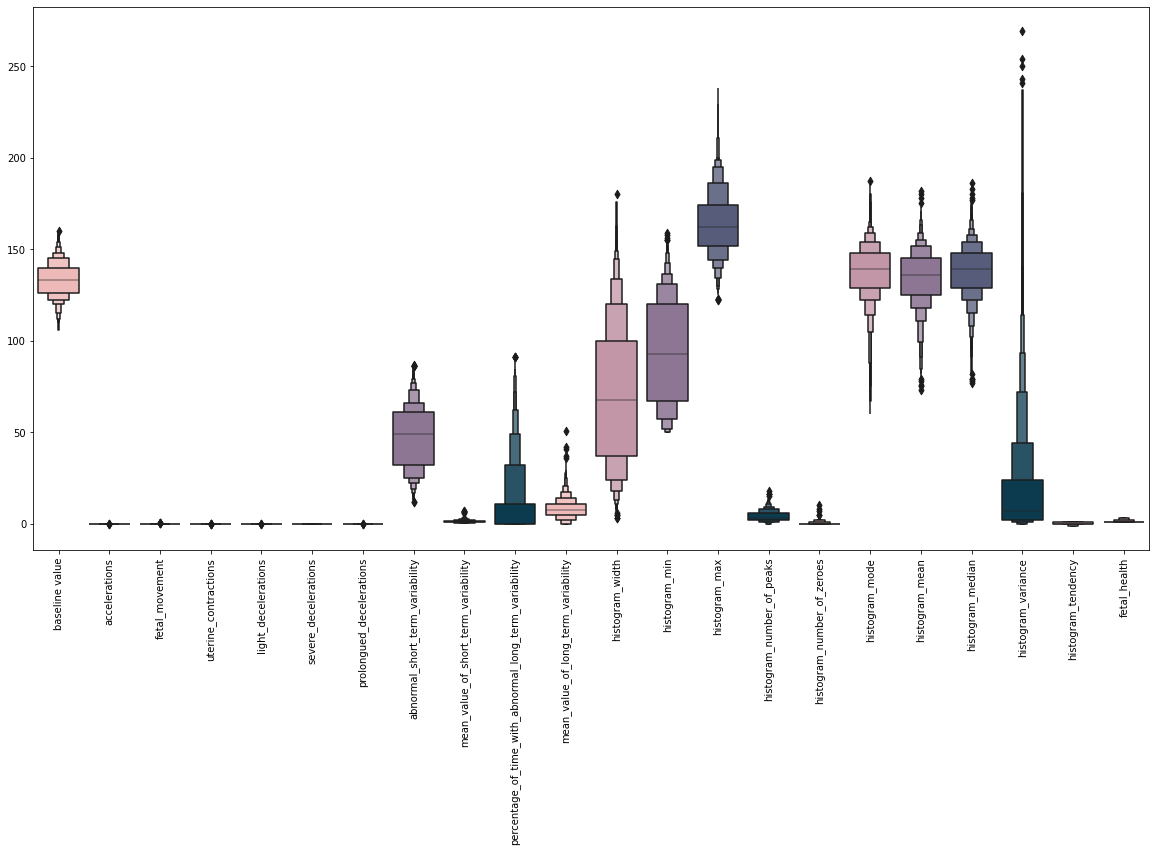

In [20]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = shades)
plt.xticks(rotation=90)
plt.show()

##Feature Engineering

###Features removed based on Correlation

We dont see any correaltion between features which is beyond the threshold of +/-0.97. So we dont want to remove any features based on correlation.

###Feature Creation and Ranking

Picking only the columns "baseline  value, fetal_movement, terine_contractions, light_decelerations, severe_decelerations, 
prolonged_decelerations and abnormal_short_term_variability " as specified in the assignment problem statement"

In [21]:
#X=df.drop(["fetal_health"],axis=1)
X=df[['baseline value', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability']]
y=df["fetal_health"]

In [22]:
X.shape

(2126, 7)

Problem Statement is a Classifier, so we can use the Information Gain value of each feature and rank them based on the information gain value.


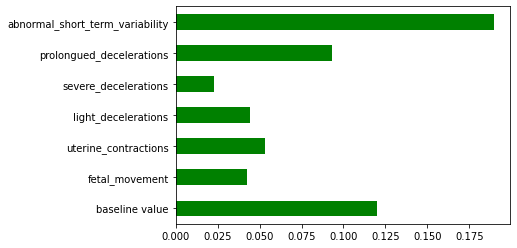

In [23]:
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns)
feat_importances.plot(kind='barh', color = 'green')
plt.show()

Feature "abnormal_short_term_variability" seems the most important feature based on ranking done. 

###Class Imbalance Treatment

In [24]:
#In the Dataset section we have seen that there is an imbalance in the class variable(fetal_health). 
#Using OverSampling
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

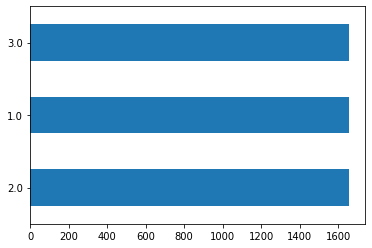

In [25]:
y_resampled.value_counts().plot(kind='barh')

In [26]:
#Using UnderSampling
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

In [27]:
y_undersampled.value_counts()

1.0    176
2.0    176
3.0    176
Name: fetal_health, dtype: int64

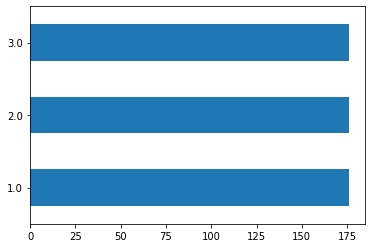

In [28]:
y_undersampled.value_counts().plot(kind='barh')

We have created two additional sets of data which have balanced classes by using Oversampling and Undersampling techniques. 

In [29]:
#Set up a standard scaler for the feature standardization
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675


In [30]:
#Standardize Oversampled and Undersampled data as well
X_df_over= s_scaler.fit_transform(X_resampled)
X_df_over = pd.DataFrame(X_df_over, columns=col_names) 
X_df_under= s_scaler.fit_transform(X_undersampled)
X_df_under = pd.DataFrame(X_df_under, columns=col_names) 

##Model Building

##Model selection and building

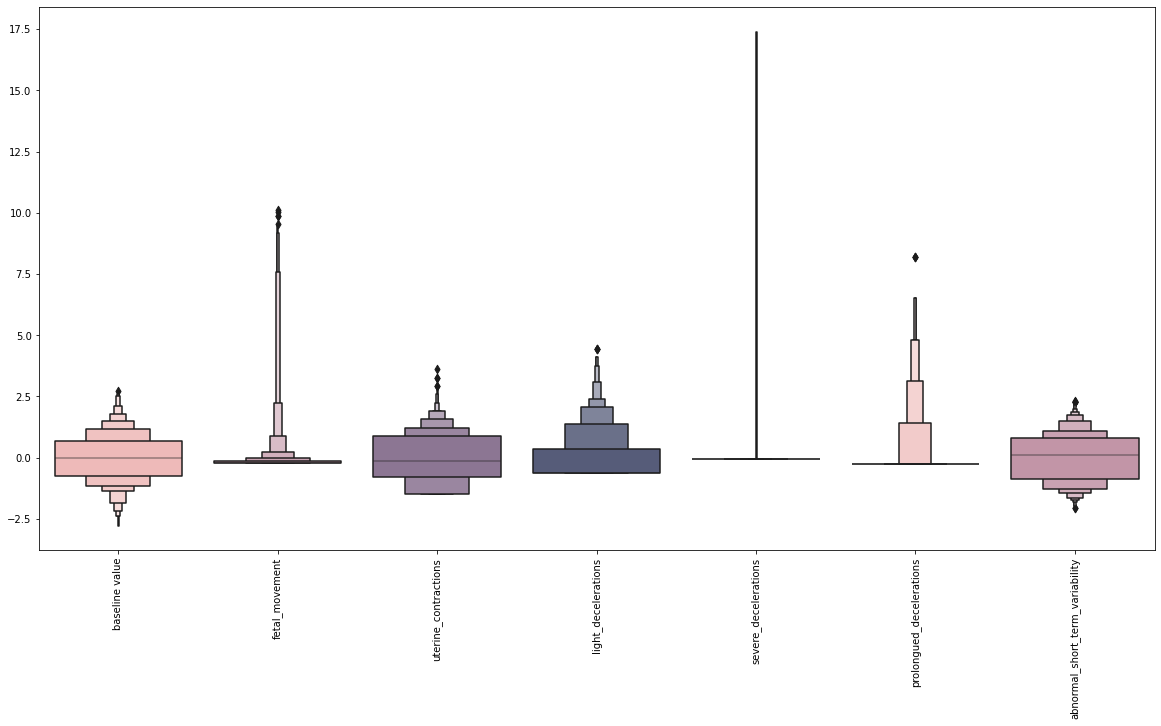

In [31]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

###Test, Train Data Split

In [32]:
#Splitting data into Test and Train sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)
X_train_over, X_test_over, y_train_over,y_test_over = train_test_split(X_df_over,y_resampled,test_size=0.3,random_state=42)
X_train_under, X_test_under, y_train_under,y_test_under = train_test_split(X_df_under,y_undersampled,test_size=0.3,random_state=42)

###Ensemble Pipeline

Creating Pipeline for different classifiers used.

In [33]:
#A quick model selection process
#Pipelines of models
pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

#pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_dt, pipeline_rf, pipeline_svc]


# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest', 2: 'SVC'}


# Fit the pipelines on original data
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Decision Tree: 0.869644 
RandomForest: 0.916674 
SVC: 0.866928 


In [34]:
#Checking model accuracy by fitting on Oversampled data
# Fit the pipelines on original data
pipelines_over = [pipeline_dt, pipeline_rf, pipeline_svc]

for pipe in pipelines_over:
    pipe.fit(X_train_over, y_train_over)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines_over):
    cv_score_over = cross_val_score(model, X_train_over,y_train_over, cv=10 )
    cv_results_accuracy.append(cv_score_over)
    print("%s: %f " % (pipe_dict[i], cv_score_over.mean()))

Decision Tree: 0.965180 
RandomForest: 0.974392 
SVC: 0.817849 


In [35]:
#Checking model accuracy by fitting on Undersampled data
# Fit the pipelines on original data
pipelines_under = [pipeline_dt, pipeline_rf, pipeline_svc]

for pipe in pipelines_under:
    pipe.fit(X_train_under, y_train_under)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines_under):
    cv_score_under = cross_val_score(model, X_train_under,y_train_under, cv=10 )
    cv_results_accuracy.append(cv_score_under)
    print("%s: %f " % (pipe_dict[i], cv_score_under.mean()))

Decision Tree: 0.747673 
RandomForest: 0.801802 
SVC: 0.778153 


Based on the above we see that the training accuracy improves on the oversampled data where the class imbalance was removed using oversampling of under represented classes.

###Hyper Parameter Tuning

In [36]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=119)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(2, 9),
              'min_samples_leaf': np.arange(1,5)}]
svc_params = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
best_model = []

for pipe in pipelines:
  #Grid search
  if pipe.steps[0][0] == 'sv_classifier':
    tree_param = svc_params
  dtree_model = GridSearchCV(estimator=pipe.steps[0][1], 
                     param_grid=tree_param, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')
  model = dtree_model.fit(X_train_over, y_train_over)
  print('Best Parameters for Classifier:', pipe.steps[0][0], 'is:', model.best_params_)
  print('Best Accuracy Score for Classifier:', pipe.steps[0][0], 'is:', model.best_score_.round(3))
  print('Best Estimator for Classifier:',pipe.steps[0][0], 'is:', model.best_estimator_)
  best_model.append(model)
  


Fitting 10 folds for each of 56 candidates, totalling 560 fits
Best Parameters for Classifier: dt_classifier is: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}
Best Accuracy Score for Classifier: dt_classifier is: 0.89
Best Estimator for Classifier: dt_classifier is: DecisionTreeClassifier(max_depth=8, random_state=42)
Fitting 10 folds for each of 56 candidates, totalling 560 fits
Best Parameters for Classifier: rf_classifier is: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
Best Accuracy Score for Classifier: rf_classifier is: 0.902
Best Estimator for Classifier: rf_classifier is: RandomForestClassifier(criterion='entropy', max_depth=8)
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters for Classifier: sv_classifier is: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy Score for Classifier: sv_classifier is: 0.946
Best Estimator for Classifier: sv_classifier is: SVC(C=1000, gamma=1)


## Evaluation Metrics

In [37]:
#Function to generate desired evaluation metrics
def evaluationMetrics(actuals, preds, test = False, confMat = True):
    if test != True:
        datatype = 'Training'
    else:
        datatype = 'Testing'
        
    #print("Evaluation Metrics")
    print("---------- -------")
    acc = accuracy_score(actuals, preds).round(3)
    
    print('\nAccuracy: {:.3f}\n'.format(accuracy_score(actuals, preds)))

    print('Micro Precision: {:.3f}'.format(precision_score(actuals, preds, average='micro')))
    print('Micro Recall: {:.3f}'.format(recall_score(actuals, preds, average='micro')))
    print('Micro F1-score: {:.3f}\n'.format(f1_score(actuals, preds, average='micro')))

    print('Macro Precision: {:.3f}'.format(precision_score(actuals, preds, average='macro')))
    print('Macro Recall: {:.3f}'.format(recall_score(actuals, preds, average='macro')))
    print('Macro F1-score: {:.3f}\n'.format(f1_score(actuals, preds, average='macro')))

    print('Weighted Precision: {:.3f}'.format(precision_score(actuals, preds, average='weighted')))
    print('Weighted Recall: {:.3f}'.format(recall_score(actuals, preds, average='weighted')))
    print('Weighted F1-score: {:.3f}\n'.format(f1_score(actuals, preds, average='weighted')))    
    
    if confMat == True:
        print("Confusion Matrix")
        print("--------- ------")
        cm = confusion_matrix(actuals, preds)
        confMatrixPlot(cm)
        
    print(f"Classification Report")
    print("--------------- ------")
    print(f"{classification_report(actuals, preds, digits = 3, target_names=['Type 1', 'Type 2', 'Type 3'])}")
    
    return acc
    
def confMatrixPlot(cm):
        sns.heatmap(cm,
                    annot=True,
                    fmt='.0f',
                    cmap='YlGn',
                    xticklabels=['Normal', 'Suspect', 'Pathalogical'],
                    yticklabels=['Normal', 'Suspect', 'Pathalogical'])
        plt.ylabel('Actual label', fontsize=14)
        plt.xlabel('Predicted label', fontsize=14)
        plt.show()

Evaluation Metrics for model: Decision Tree
---------- -------

Accuracy: 0.910

Micro Precision: 0.910
Micro Recall: 0.910
Micro F1-score: 0.910

Macro Precision: 0.918
Macro Recall: 0.909
Macro F1-score: 0.910

Weighted Precision: 0.917
Weighted Recall: 0.910
Weighted F1-score: 0.911

Confusion Matrix
--------- ------


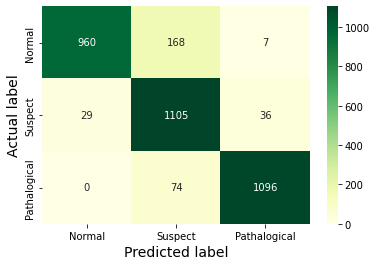

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.971     0.846     0.904      1135
      Type 2      0.820     0.944     0.878      1170
      Type 3      0.962     0.937     0.949      1170

    accuracy                          0.910      3475
   macro avg      0.918     0.909     0.910      3475
weighted avg      0.917     0.910     0.911      3475

Evaluation Metrics for model: RandomForest
---------- -------

Accuracy: 0.927

Micro Precision: 0.927
Micro Recall: 0.927
Micro F1-score: 0.927

Macro Precision: 0.931
Macro Recall: 0.927
Macro F1-score: 0.928

Weighted Precision: 0.931
Weighted Recall: 0.927
Weighted F1-score: 0.928

Confusion Matrix
--------- ------


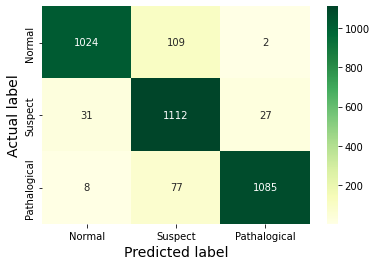

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.963     0.902     0.932      1135
      Type 2      0.857     0.950     0.901      1170
      Type 3      0.974     0.927     0.950      1170

    accuracy                          0.927      3475
   macro avg      0.931     0.927     0.928      3475
weighted avg      0.931     0.927     0.928      3475

Evaluation Metrics for model: SVC
---------- -------

Accuracy: 0.976

Micro Precision: 0.976
Micro Recall: 0.976
Micro F1-score: 0.976

Macro Precision: 0.976
Macro Recall: 0.975
Macro F1-score: 0.976

Weighted Precision: 0.976
Weighted Recall: 0.976
Weighted F1-score: 0.976

Confusion Matrix
--------- ------


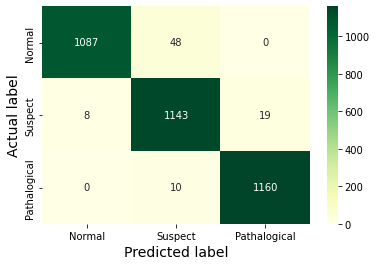

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.993     0.958     0.975      1135
      Type 2      0.952     0.977     0.964      1170
      Type 3      0.984     0.991     0.988      1170

    accuracy                          0.976      3475
   macro avg      0.976     0.975     0.976      3475
weighted avg      0.976     0.976     0.976      3475



In [42]:
#Predict on Test data to check the performance of best fit model on the test data. This is done on the oversampled data which gave better training accuracy.
length = len(best_model)
for models in range(length):
  dtree_train_predicts = best_model[models].predict(X_train_over)
  print("Evaluation Metrics for model:",pipe_dict[models])
  train_acc = evaluationMetrics(y_train_over, dtree_train_predicts)


Evaluation Metrics for model: Decision Tree
---------- -------

Accuracy: 0.611

Micro Precision: 0.611
Micro Recall: 0.611
Micro F1-score: 0.611

Macro Precision: 0.515
Macro Recall: 0.679
Macro F1-score: 0.520

Weighted Precision: 0.814
Weighted Recall: 0.611
Weighted F1-score: 0.660

Confusion Matrix
--------- ------


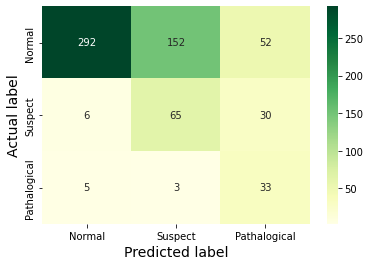

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.964     0.589     0.731       496
      Type 2      0.295     0.644     0.405       101
      Type 3      0.287     0.805     0.423        41

    accuracy                          0.611       638
   macro avg      0.515     0.679     0.520       638
weighted avg      0.814     0.611     0.660       638

Evaluation Metrics for model: RandomForest
---------- -------

Accuracy: 0.632

Micro Precision: 0.632
Micro Recall: 0.632
Micro F1-score: 0.632

Macro Precision: 0.520
Macro Recall: 0.694
Macro F1-score: 0.530

Weighted Precision: 0.821
Weighted Recall: 0.632
Weighted F1-score: 0.681

Confusion Matrix
--------- ------


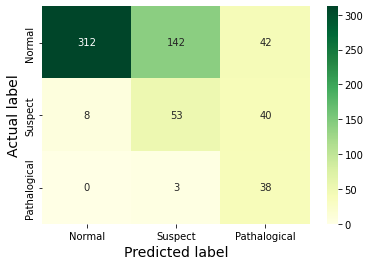

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.975     0.629     0.765       496
      Type 2      0.268     0.525     0.355       101
      Type 3      0.317     0.927     0.472        41

    accuracy                          0.632       638
   macro avg      0.520     0.694     0.530       638
weighted avg      0.821     0.632     0.681       638

Evaluation Metrics for model: SVC
---------- -------

Accuracy: 0.563

Micro Precision: 0.563
Micro Recall: 0.563
Micro F1-score: 0.563

Macro Precision: 0.500
Macro Recall: 0.674
Macro F1-score: 0.484

Weighted Precision: 0.823
Weighted Recall: 0.563
Weighted F1-score: 0.621

Confusion Matrix
--------- ------


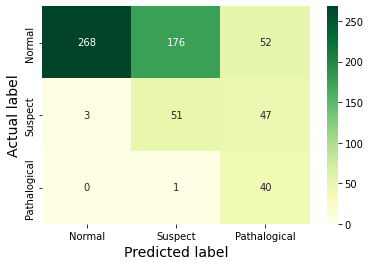

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.989     0.540     0.699       496
      Type 2      0.224     0.505     0.310       101
      Type 3      0.288     0.976     0.444        41

    accuracy                          0.563       638
   macro avg      0.500     0.674     0.484       638
weighted avg      0.823     0.563     0.621       638



In [40]:
#Checking Evaluation Metrics on original data set without data balancing
for i, model in enumerate(pipelines):
    predicts = model.predict(X_test)
    print("Evaluation Metrics for model:",pipe_dict[i])
    train_acc = evaluationMetrics(y_test, predicts)
  

Evaluation Metrics for model: Decision Tree
---------- -------

Accuracy: 0.767

Micro Precision: 0.767
Micro Recall: 0.767
Micro F1-score: 0.767

Macro Precision: 0.765
Macro Recall: 0.765
Macro F1-score: 0.765

Weighted Precision: 0.769
Weighted Recall: 0.767
Weighted F1-score: 0.768

Confusion Matrix
--------- ------


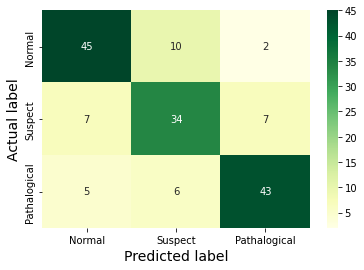

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.789     0.789     0.789        57
      Type 2      0.680     0.708     0.694        48
      Type 3      0.827     0.796     0.811        54

    accuracy                          0.767       159
   macro avg      0.765     0.765     0.765       159
weighted avg      0.769     0.767     0.768       159

Evaluation Metrics for model: RandomForest
---------- -------

Accuracy: 0.824

Micro Precision: 0.824
Micro Recall: 0.824
Micro F1-score: 0.824

Macro Precision: 0.828
Macro Recall: 0.824
Macro F1-score: 0.823

Weighted Precision: 0.834
Weighted Recall: 0.824
Weighted F1-score: 0.827

Confusion Matrix
--------- ------


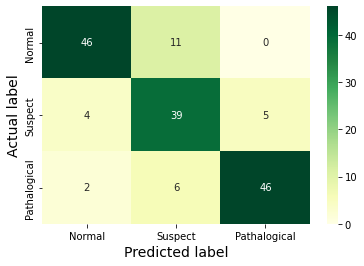

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.885     0.807     0.844        57
      Type 2      0.696     0.812     0.750        48
      Type 3      0.902     0.852     0.876        54

    accuracy                          0.824       159
   macro avg      0.828     0.824     0.823       159
weighted avg      0.834     0.824     0.827       159

Evaluation Metrics for model: SVC
---------- -------

Accuracy: 0.780

Micro Precision: 0.780
Micro Recall: 0.780
Micro F1-score: 0.780

Macro Precision: 0.779
Macro Recall: 0.778
Macro F1-score: 0.777

Weighted Precision: 0.786
Weighted Recall: 0.780
Weighted F1-score: 0.781

Confusion Matrix
--------- ------


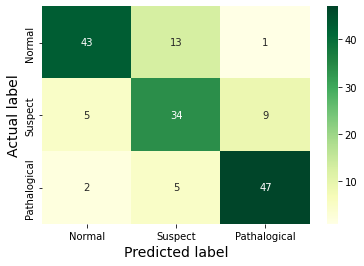

Classification Report
--------------- ------
              precision    recall  f1-score   support

      Type 1      0.860     0.754     0.804        57
      Type 2      0.654     0.708     0.680        48
      Type 3      0.825     0.870     0.847        54

    accuracy                          0.780       159
   macro avg      0.779     0.778     0.777       159
weighted avg      0.786     0.780     0.781       159



In [41]:
#Checking Evaluation Metrics on original data set without data balancing
for i, model in enumerate(pipelines_under):
    predicts = model.predict(X_test_under)
    print("Evaluation Metrics for model:",pipe_dict[i])
    train_acc = evaluationMetrics(y_test_under, predicts)
  



1.  We can see that the performance of the model built on the original data set which had class imbalance behaves very poorly on the test data for all the classifier models used. 
2.  Compared to Under sampling, over sampling provides better train and test accuracy. 



###Charts representing Metrics

ROC Curves plotting

###Conclusion/Observations